# Pathway database stats

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cmcrameri as cmc
import sspa
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
import scipy.stats as stats

c:\Users\cw2019\.conda\envs\py10\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\cw2019\.conda\envs\py10\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\cw2019\.conda\envs\py10\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
mo_paths_reactome = pd.read_csv("../Pathway_databases/Reactome_multi_omics_ChEBI_Uniprot.csv", index_col=0)
# load multi-omics pathways
reactome_cpds = sspa.process_gmt('../Pathway_databases/Reactome_Homo_sapiens_pathways_compounds_R81.gmt')
reactome_uniprot = sspa.process_pathways.process_reactome("Homo sapiens", "../Pathway_databases/UniProt2Reactome_All_Levels.txt")
reactome_ensembl = sspa.process_pathways.process_reactome("Homo sapiens", "../Pathway_databases/Ensembl2Reactome_All_Levels.txt")

C:\Users\cw2019\AppData\Local\Temp\ipykernel_35976\241743041.py:1: DtypeWarning: Columns (242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,46

In [3]:
reactome_dict = sspa.utils.pathwaydf_to_dict(mo_paths_reactome)
reactome_cpds_dict = sspa.utils.pathwaydf_to_dict(reactome_cpds)
reactome_prot_dict = sspa.utils.pathwaydf_to_dict(reactome_uniprot)
reactome_gene_dict = sspa.utils.pathwaydf_to_dict(reactome_ensembl)

In [5]:
mo_paths_kegg = sspa.process_gmt('../Pathway_databases/KEGG_hsa_pathways_compounds_genes_R105.gmt')
kegg_dict = sspa.utils.pathwaydf_to_dict(mo_paths_kegg)

In [6]:
mo_paths_reactome.head()

Pathway_name       0_x     1_x     2_x  \
R-HSA-1059683          Interleukin-6 signaling    P08887  Q06124  O14543   
R-HSA-109581                         Apoptosis    P12830  P31947  Q8N726   
R-HSA-109582                        Hemostasis    P30626  Q9ULI4  Q9UM01   
R-HSA-109606   Intrinsic Pathway for Apoptosis  O43236-6  P31751  P31947   
R-HSA-109703               PKB-mediated events    P31751  Q13370     NaN   

                    3_x     4_x     5_x     6_x     7_x     8_x  ... 1490_y  \
R-HSA-1059683  P40189-2  P29597  P40763  P42224  P40189  P22681  ...   None   
R-HSA-109581     P35998  P0CG48  P25445  P51813  O76075  P55211  ...   None   
R-HSA-109582     Q04876  Q9UK08  O75083  Q9NSK0  P29475  Q02156  ...   None   
R-HSA-109606     P62258  Q16611  Q8N726  Q14186  Q9BZF9  Q9NQS1  ...   None   
R-HSA-109703        NaN     NaN     NaN     NaN     NaN     NaN  ...   None   

              1491_y 1492_y 1493_y 1494_y 1495_y 1496_y 1497_y 1498_y 1499_y  
R-HSA-1059683   None   None   None   None   None   None   None   None   None  
R-HSA-109581    None   None   None   None   None   None   None   None   None  
R-HSA-109582    None   None   None   None   None   None   None   None   None  
R-HSA-109606    None   None   None   None   None   None   None   None   None  
R-HSA-109703    None   None   None   None   None   None   None   None   None  

[5 rows x 4089 columns]

## Reactome - non dataset-specific

In [6]:
# number of pathways 
n_pathways_reactome = mo_paths_reactome.shape[0]
n_pathways_reactome

2583

In [8]:
# number of multi-omic pathways

In [7]:
# average pathway size (all)
sizes_reactome = [len(v) for k, v in reactome_dict.items()]
print(np.mean(sizes_reactome))
print(np.median(sizes_reactome))
print(min(sizes_reactome))
print(max(sizes_reactome))

# average pathway size (metabolite)
sizes_reactome_cpd = [len(v) for k, v in reactome_cpds_dict.items()]
print(np.mean(sizes_reactome_cpd))
print(np.median(sizes_reactome_cpd))
print(min(sizes_reactome_cpd))
print(max(sizes_reactome_cpd))

# average pathway size (protein)
sizes_reactome_prot = [len(v) for k, v in reactome_prot_dict.items()]
print(np.mean(sizes_reactome_prot))
print(np.median(sizes_reactome_prot))
print(min(sizes_reactome_prot))
print(max(sizes_reactome_prot))


# average pathway size (gene)
sizes_reactome_gene = [len(v) for k, v in reactome_gene_dict.items()]
print(np.mean(sizes_reactome_gene))
print(np.median(sizes_reactome_gene))
print(min(sizes_reactome_gene))
print(max(sizes_reactome_gene))

62.73131392604249
24.0
2
3643
14.59032967032967
6.0
2
1500
55.69574652777778
19.0
2
2588
382.4151017214397
124.0
4
19918


In [14]:
reactome_size_dist = pd.DataFrame(sizes_reactome + sizes_reactome_cpd + sizes_reactome_prot, columns=['Size'])
reactome_size_dist['Source'] = ['Multi-omics'] * len(sizes_reactome) + ['Compound'] * len(sizes_reactome_cpd) + ['Protein'] * len(sizes_reactome_prot)
reactome_size_dist['Log10_size'] = np.log10(reactome_size_dist['Size'])
reactome_size_dist['Database'] = 'Reactome_human'

In [11]:
reactome_size_dist

Size       Source  Log10_size        Database
0       17  Multi-omics    1.230449  Reactome_human
1      192  Multi-omics    2.283301  Reactome_human
2      812  Multi-omics    2.909556  Reactome_human
3       62  Multi-omics    1.792392  Reactome_human
4        8  Multi-omics    0.903090  Reactome_human
...    ...          ...         ...             ...
7116    95      Protein    1.977724  Reactome_human
7117   176      Protein    2.245513  Reactome_human
7118   184      Protein    2.264818  Reactome_human
7119    43      Protein    1.633468  Reactome_human
7120    29      Protein    1.462398  Reactome_human

[7121 rows x 4 columns]

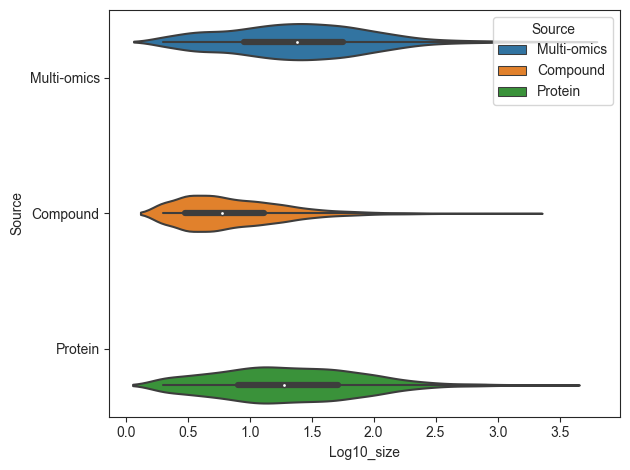

In [12]:
sns.set_style('ticks')
sns.violinplot(
    data=reactome_size_dist,
    x='Log10_size',
    y='Source',
    hue='Source')
plt.tight_layout()
plt.show()

## KEGG - non dataset-specific

In [13]:
# number of pathways 
n_pathways_kegg = mo_paths_kegg.shape[0]
n_pathways_kegg

352

In [8]:
kegg_dict_met = {k: [i for i in v if i.startswith('C')] for k, v in kegg_dict.items()}
kegg_dict_met = {k: v for k, v in kegg_dict_met.items() if v != []}
kegg_dict_prot = {k: [i for i in v if i.startswith('hsa:')] for k, v in kegg_dict.items()}

In [10]:
# average pathway size (all)
sizes_kegg = [len(v) for k, v in kegg_dict.items()]
print(np.mean(sizes_kegg))
print(np.median(sizes_kegg))
print(min(sizes_kegg))
print(max(sizes_kegg))

# average pathway size (metabolite)
sizes_kegg_cpd = [len(v) for k, v in kegg_dict_met.items()]
print(np.mean(sizes_kegg_cpd))
print(np.median(sizes_kegg_cpd))
print(min(sizes_kegg_cpd))
print(max(sizes_kegg_cpd))

# average pathway size (protein)
sizes_kegg_prot = [len(v) for k, v in kegg_dict_prot.items()]
print(np.mean(sizes_kegg_prot))
print(np.median(sizes_kegg_prot))
print(min(sizes_kegg_prot))
print(max(sizes_kegg_prot))

120.09943181818181
96.0
5
1541
20.684587813620073
10.0
1
148
101.57670454545455
76.0
3
1541


In [11]:
kegg_size_dist = pd.DataFrame(sizes_kegg + sizes_kegg_cpd + sizes_kegg_prot, columns=['Size'])
kegg_size_dist['Source'] = ['Multi-omics'] * len(sizes_kegg) + ['Compound'] * len(sizes_kegg_cpd) + ['Protein'] * len(sizes_kegg_prot)
kegg_size_dist['Log10_size'] = np.log10(kegg_size_dist['Size'])
kegg_size_dist['Database'] = 'KEGG_human'

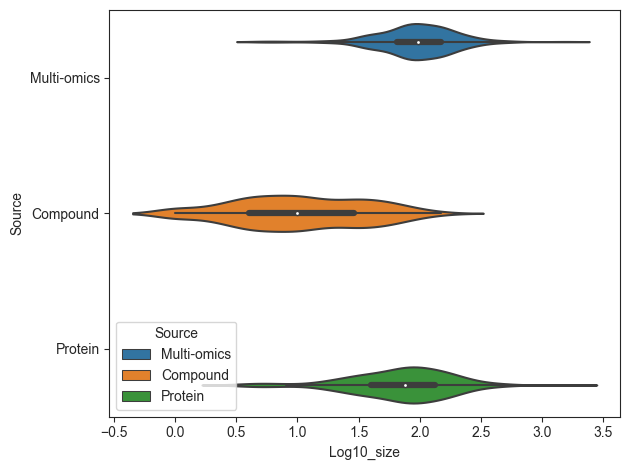

In [12]:
sns.set_style('ticks')
sns.violinplot(
    data=kegg_size_dist,
    x='Log10_size',
    y='Source',
    hue='Source')
plt.tight_layout()
plt.show()

In [15]:
combined_df_dist = pd.concat([kegg_size_dist, reactome_size_dist])

In [16]:
combined_df_dist.head()

Size       Source  Log10_size    Database
0    99  Multi-omics    1.995635  KEGG_human
1    51  Multi-omics    1.707570  KEGG_human
2    67  Multi-omics    1.826075  KEGG_human
3    94  Multi-omics    1.973128  KEGG_human
4    88  Multi-omics    1.944483  KEGG_human

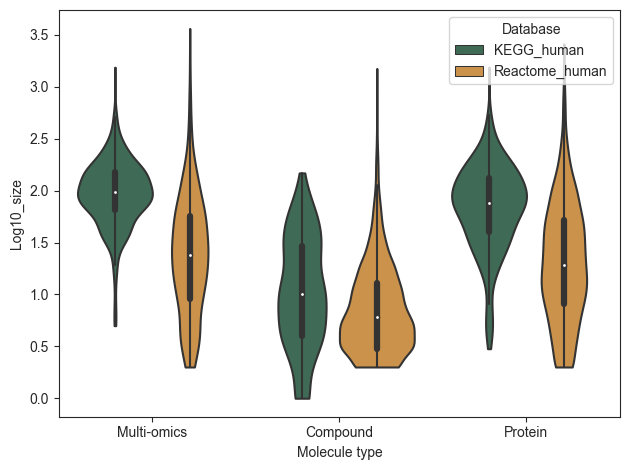

In [17]:
sns.violinplot(
    data=combined_df_dist,
    x='Source',
    y='Log10_size',
    hue='Database',
    cut=0,
    # split=True
    # inner='quartiles',
    palette='cmc.batlow',
    saturation=0.9,
)

plt.xlabel('Log10 pathway size')
plt.xlabel('Molecule type')
plt.tight_layout()
plt.show()

## COPDGene


In [92]:
# load metadata
md = pd.read_csv('../COPDgene/COPDgene_phonotype.txt', sep='\t')

# load omics datasets
prot = pd.read_csv('../COPDgene/COPDgene_proteomics_UniProt.csv', index_col=0)
metab = pd.read_csv('../COPDgene/COPDgene_metabolomics_CHEBI_mapped.csv', index_col=0)
trans = pd.read_csv('D:/COPDgene/Processed/COPDgene_transcriptomics_filt_Q1_scaled.csv', index_col=0)
# load omics datasets
prot_kegg = pd.read_csv('../COPDgene/COPDgene_proteomics_KEGG.csv', index_col=0)
metab_kegg = pd.read_csv('../COPDgene/COPDgene_metabolomics_KEGG_mapped.csv', index_col=0)

C:\Users\cw2019\AppData\Local\Temp\ipykernel_35976\1941085509.py:2: DtypeWarning: Columns (568) have mixed types. Specify dtype option on import or set low_memory=False.
  md = pd.read_csv('../COPDgene/COPDgene_phonotype.txt', sep='\t')


In [19]:
compounds_present = metab.columns.tolist()
pathways_present_m = {k: v for k, v in reactome_dict.items() if len([i for i in compounds_present if i in v]) >= 2}
path_coverage_m = {k: [i for i in v if i in compounds_present] for k, v in pathways_present_m.items()}

In [20]:
proteins_present = prot.columns.tolist()
pathways_present_p = {k: v for k, v in reactome_dict.items() if len([i for i in proteins_present if i in v]) >= 2}
path_coverage_p = {k: [i for i in v if i in proteins_present] for k, v in pathways_present_p.items()}


In [96]:
trans_present = trans.columns.tolist()
pathways_present_t = {k: v for k, v in reactome_gene_dict.items() if len([i for i in trans_present if i in v]) >= 2}
path_coverage_t = {k: [i for i in v if i in trans_present] for k, v in pathways_present_t.items()}

In [98]:
n_unique_molecules_t = len(set(sum(path_coverage_t.values(), [])))

In [99]:
n_unique_molecules_t

3978

In [104]:
all_trans_mols = set(sum(reactome_gene_dict.values(), []))

In [108]:
len(all_trans_mols)

83059

In [113]:
len(set(all_trans_mols))

83059

In [107]:
len(set(trans_present).intersection(all_trans_mols))

3978

In [115]:
(3978/83059)*100

4.789366594830181

In [21]:
copd_present = prot.columns.tolist() + metab.columns.tolist()
pathways_present_mp = {k: v for k, v in reactome_dict.items() if len([i for i in copd_present if i in v]) >= 2}
path_coverage_mp = {k: [i for i in v if i in copd_present] for k, v in pathways_present_mp.items()}


In [22]:
# compute separately for mbpls model
sizes_reactome_copd_m = [len(v) for k, v in path_coverage_m.items()]
sizes_reactome_copd_p = [len(v) for k, v in path_coverage_p.items()]
sizes_reactome_copd_mp = [len(v) for k, v in path_coverage_mp.items()]

In [23]:
reactome_size_dist_copd = pd.DataFrame(sizes_reactome_copd_mp + sizes_reactome_copd_m + sizes_reactome_copd_p, columns=['Size'])
reactome_size_dist_copd['Source'] = ['Multi-omics'] * len(sizes_reactome_copd_mp) + ['Compound'] * len(sizes_reactome_copd_m) + ['Protein'] * len(sizes_reactome_copd_p)
reactome_size_dist_copd['Log10_size'] = np.log10(reactome_size_dist_copd['Size'])
reactome_size_dist_copd['Database'] = 'Reactome_human_COPDgene'

<AxesSubplot:xlabel='Log10_size', ylabel='Source'>

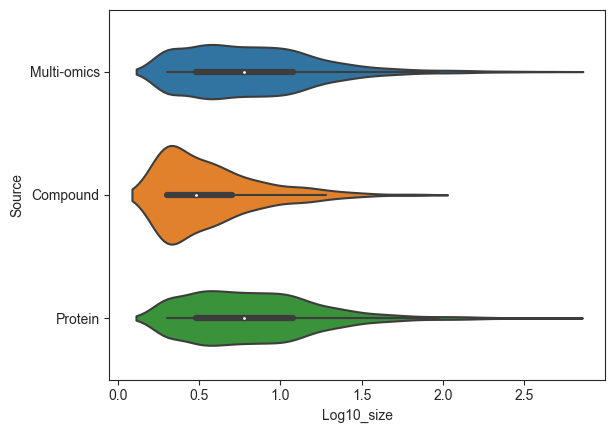

In [24]:
sns.violinplot(
    data=reactome_size_dist_copd,
    x='Log10_size',
    y='Source')

In [25]:
compounds_present_kegg = metab_kegg.columns.tolist()
pathways_present_m_kegg = {k: v for k, v in kegg_dict.items() if len([i for i in compounds_present_kegg if i in v]) >= 2}
path_coverage_m_kegg = {k: [i for i in v if i in compounds_present_kegg] for k, v in pathways_present_m_kegg.items()}

proteins_present_KEGG = prot_kegg.columns.tolist()
pathways_present_p_kegg = {k: v for k, v in kegg_dict.items() if len([i for i in proteins_present_KEGG if i in v]) >= 2}
path_coverage_p_kegg = {k: [i for i in v if i in proteins_present_KEGG] for k, v in pathways_present_p_kegg.items()}

copd_present_kegg = prot_kegg.columns.tolist() + metab_kegg.columns.tolist()
pathways_present_mp_kegg = {k: v for k, v in kegg_dict.items() if len([i for i in copd_present_kegg if i in v]) >= 2}
path_coverage_mp_kegg = {k: [i for i in v if i in copd_present_kegg] for k, v in pathways_present_mp_kegg.items()}


In [26]:

# compute separately for mbpls model
sizes_kegg_copd_m = [len(v) for k, v in path_coverage_m_kegg.items()]
sizes_kegg_copd_p = [len(v) for k, v in path_coverage_p_kegg.items()]
sizes_kegg_copd_mp = [len(v) for k, v in path_coverage_mp_kegg.items()]
kegg_size_dist_copd = pd.DataFrame(sizes_kegg_copd_mp + sizes_kegg_copd_m + sizes_kegg_copd_p, columns=['Size'])
kegg_size_dist_copd['Source'] = ['Multi-omics'] * len(sizes_kegg_copd_mp) + ['Compound'] * len(sizes_kegg_copd_m) + ['Protein'] * len(sizes_kegg_copd_p)
kegg_size_dist_copd['Log10_size'] = np.log10(kegg_size_dist_copd['Size'])
kegg_size_dist_copd['Database'] = 'KEGG_human_COPDgene'

In [27]:
combined_df_dist = pd.concat([kegg_size_dist, reactome_size_dist, reactome_size_dist_copd, kegg_size_dist_copd])

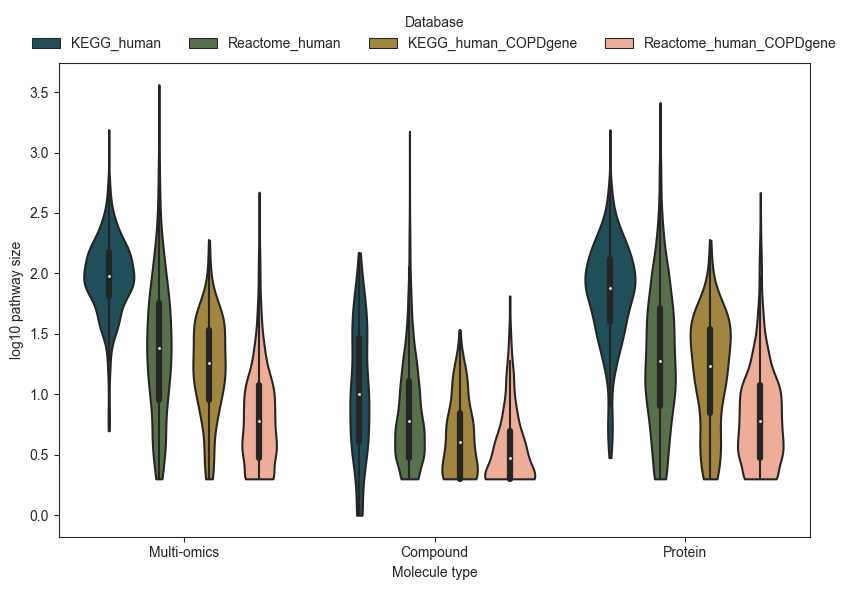

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.set_style('whitegrid')
ax = sns.violinplot(
    data=combined_df_dist,
    x='Source',
    y='Log10_size',
    hue='Database',
    cut=0,
    # split=True
    # inner='quartiles',
    palette='cmc.batlow',
    # saturation=0.9,
    hue_order=['KEGG_human','Reactome_human',  'KEGG_human_COPDgene',  'Reactome_human_COPDgene']
)

plt.ylabel('log10 pathway size')
plt.xlabel('Molecule type')
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=4, frameon=False)
plt.tight_layout()
# plt.savefig('../Figures/Pathway_db_size_dist.png', dpi=350, bbox_inches='tight')
plt.show()

### Plot of pathway size in KEGG, Reactome, COPDgene, and COVID

## COVID

In [32]:
# COVID sizes 
covid_metab = pd.read_csv('../COVID_data/metab_chebi.csv', index_col=0)
covid_prot = pd.read_csv('../COVID_data/prot_uniprot.csv', index_col=0)
covid_metab_kegg = pd.read_csv('../COVID_data/metab_kegg.csv', index_col=0)
covid_prot_kegg = pd.read_csv('../COVID_data/prot_kegg.csv', index_col=0)

In [33]:
covid_present = covid_prot.columns.tolist() + covid_metab.columns.tolist()
covid_pathways_present_mp = {k: v for k, v in reactome_dict.items() if len([i for i in covid_present if i in v]) >= 2}
covid_path_coverage_mp = {k: [i for i in v if i in covid_present] for k, v in covid_pathways_present_mp.items()}


In [118]:
covid_pathways_present_m = {k: v for k, v in reactome_dict.items() if len([i for i in covid_metab.columns.tolist() if i in v]) >= 2}
covid_path_coverage_m = {k: [i for i in v if i in covid_metab.columns.tolist()] for k, v in covid_pathways_present_m.items()}

In [119]:
covid_pathways_present_p = {k: v for k, v in reactome_dict.items() if len([i for i in covid_prot.columns.tolist() if i in v]) >= 2}
covid_path_coverage_p = {k: [i for i in v if i in covid_prot.columns.tolist()] for k, v in covid_pathways_present_p.items()}

In [120]:
len(covid_path_coverage_m)

164

In [34]:
len(covid_pathways_present_mp)

732

In [35]:
sizes_reactome_covid_mp = [len(v) for k, v in covid_path_coverage_mp.items()]

In [43]:

reactome_size_dist_covid = pd.DataFrame(sizes_reactome_covid_mp, columns=['Size'])
reactome_size_dist_covid['Source'] = 'Multi-omics'
reactome_size_dist_covid['Log10_size'] = np.log10(reactome_size_dist_covid['Size'])
reactome_size_dist_covid['Database'] = 'Reactome_human_COVID'

In [45]:
covid_present_kegg = covid_metab_kegg.columns.tolist() + covid_prot_kegg.columns.tolist()
pathways_present_mp_kegg_covid = {k: v for k, v in kegg_dict.items() if len([i for i in covid_present_kegg if i in v]) >= 2}
path_coverage_mp_kegg_covid = {k: [i for i in v if i in covid_present_kegg] for k, v in pathways_present_mp_kegg_covid.items()}


In [46]:
# compute separately for mbpls model
sizes_kegg_covid_mp = [len(v) for k, v in path_coverage_mp_kegg.items()]
kegg_size_dist_covid = pd.DataFrame(sizes_kegg_covid_mp, columns=['Size'])
kegg_size_dist_covid['Source'] = 'Multi-omics'
kegg_size_dist_covid['Log10_size'] = np.log10(kegg_size_dist_covid['Size'])
kegg_size_dist_covid['Database'] = 'KEGG_human_COVID'
combined_df_dist = pd.concat([kegg_size_dist, reactome_size_dist,
                              kegg_size_dist_copd, reactome_size_dist_copd,
                              kegg_size_dist_covid, reactome_size_dist_covid])

In [47]:
combined_df_dist

Size       Source  Log10_size              Database
0      99  Multi-omics    1.995635            KEGG_human
1      51  Multi-omics    1.707570            KEGG_human
2      67  Multi-omics    1.826075            KEGG_human
3      94  Multi-omics    1.973128            KEGG_human
4      88  Multi-omics    1.944483            KEGG_human
..    ...          ...         ...                   ...
727     9  Multi-omics    0.954243  Reactome_human_COVID
728     2  Multi-omics    0.301030  Reactome_human_COVID
729     3  Multi-omics    0.477121  Reactome_human_COVID
730     6  Multi-omics    0.778151  Reactome_human_COVID
731     2  Multi-omics    0.301030  Reactome_human_COVID

[12995 rows x 4 columns]

In [86]:
combined_df_dist[combined_df_dist['Source'] == 'Multi-omics'].groupby('Database').size()

Database
KEGG_human                  352
KEGG_human_COPDgene         320
KEGG_human_COVID            320
Reactome_human             2542
Reactome_human_COPDgene    1521
Reactome_human_COVID        732
dtype: int64

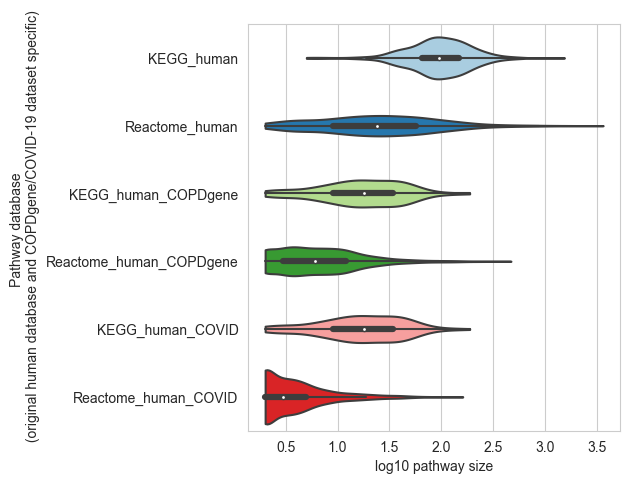

In [89]:
sns.violinplot(
    data=combined_df_dist[combined_df_dist['Source'] == 'Multi-omics'],
    y='Database',
    x='Log10_size',
    # hue='Database',
    cut=0,
    # inner='quartiles',
    orient='h',
    density_norm='count',
    palette='Paired',
    saturation=0.9,
    common_norm=True,
    hue_order=['KEGG_human','Reactome_human',  'KEGG_human_COPDgene',  'Reactome_human_COPDgene', 'KEGG_human_COVID', 'Reactome_human_COVID']
)

# plt.legend(bbox_to_anchor=(-0.1, 1.2), loc=2, borderaxespad=0, ncol=3)
plt.ylabel('Pathway database \n (original human database and COPDgene/COVID-19 dataset specific)')
plt.xlabel('log10 pathway size')
plt.tight_layout()
plt.savefig('D:/H_drive/Documents/pathway-integration/Figures/Pathway_db_size_dist_v2.png', dpi=350, bbox_inches='tight')
plt.show()


## Coverage percentage mapping to pathways

In [116]:
# total proteins reactome
all_reactome_prots = set(sum(reactome_prot_dict.values(), []))

# total metabolites reactome
all_reactome_cpds = set(sum(reactome_cpds_dict.values(), []))

In [117]:
print(len(all_reactome_prots), len(all_reactome_cpds))

11613 2375


In [131]:
# total covid metabs mapping to reactome
total_covid_mets = len(set(sum(covid_path_coverage_m.values(), [])))
total_covid_prots = len(set(sum(covid_path_coverage_p.values(), [])))

# total copd metabs mapping to reactome
total_copd_mets = len(set(sum(path_coverage_m.values(), [])))
total_copd_prots = len(set(sum(path_coverage_p.values(), [])))

In [152]:
# total copd trans mapping to reactome
total_copd_trans = list(set(sum(path_coverage_t.values(), [])))
# only keep ensembl genes
total_copd_trans_genes = [i for i in total_copd_trans if i.startswith('ENSG')]

In [150]:
trans.columns

Index(['ENSG00000000419.13', 'ENSG00000000460.17', 'ENSG00000000938.13',
       'ENSG00000000971.16', 'ENSG00000001084.13', 'ENSG00000001460.18',
       'ENSG00000001561.7', 'ENSG00000001630.17', 'ENSG00000002016.18',
       'ENSG00000002330.14',
       ...
       'ENSG00000288636.1', 'ENSG00000288640.1', 'ENSG00000288645.1',
       'ENSG00000288649.1', 'ENSG00000288661.1', 'ENSG00000288663.1',
       'ENSG00000288680.1', 'ENSG00000288681.1', 'ENSG00000288684.1',
       'ENSG00000288686.1'],
      dtype='object', length=14441)

In [144]:
total_copd_trans

3978

In [154]:
len(set(total_copd_trans_genes))/len(set(trans.columns.tolist()))*100

27.546568797174707

In [145]:
len(set(trans.columns.tolist()))

14441

In [122]:
print(total_covid_mets, total_covid_prots)

75 355


In [127]:
covid_metab_chebi = [i for i in covid_metab.columns.tolist() if i.isnumeric()]

In [129]:
(75/len(covid_metab_chebi))*100

23.88535031847134

In [132]:
print(total_copd_mets, total_copd_prots)

84 1067


In [130]:
copd_metab_chebi = [i for i in metab.columns.tolist() if i.isnumeric()]

In [137]:
(1064/len(prot.columns.to_list()))*100

81.53256704980842

In [139]:
(355/len(covid_prot.columns.to_list()))*100

77.85087719298247

In [91]:
reactome_gene_dict

{'R-HSA-1059683': ['ENSG00000096968.14',
  'ENSP00000467985',
  'ENST00000673841',
  'ENSP00000385675',
  'ENST00000264033',
  'ENSP00000264033',
  'ENST00000672247',
  'ENSP00000489597',
  'ENST00000342505',
  'ENSP00000503181',
  'ENSP00000500485',
  'ENSG00000160712.13',
  'ENST00000672434',
  'ENST00000678044',
  'ENST00000679014',
  'ENST00000392322',
  'ENST00000635625',
  'ENSG00000115415',
  'ENSG00000184557.4',
  'ENSP00000501164',
  'ENST00000678827',
  'ENSP00000501225',
  'ENST00000671929',
  'ENST00000671954',
  'ENSP00000376136',
  'ENSP00000330341',
  'ENSP00000384943',
  'ENST00000522633',
  'ENST00000525621',
  'ENST00000415035',
  'ENST00000368485',
  'ENSG00000168610.16',
  'ENSG00000105397',
  'ENSP00000435399',
  'ENSP00000431885',
  'ENSP00000503102',
  'ENSP00000467000',
  'ENSP00000503237',
  'ENST00000258743',
  'ENST00000361099',
  'ENSG00000179295.19',
  'ENST00000381298',
  'ENST00000677723',
  'ENST00000409465',
  'ENSP00000499884',
  'ENSG00000134352',
  '

In [29]:
stats.describe(sizes_kegg_copd_mp)

DescribeResult(nobs=320, minmax=(2, 188), mean=24.5625, variance=543.0619122257052, skewness=2.711534187758718, kurtosis=12.088349441716936)

In [30]:
stats.describe(sizes_reactome_copd_mp)

DescribeResult(nobs=1521, minmax=(2, 470), mean=12.20249835634451, variance=714.5681779646355, skewness=8.984364466470925, kurtosis=111.65634128267452)

In [38]:
np.median(sizes_kegg_copd_mp)

18.0

In [39]:
np.median(sizes_reactome_copd_mp)

6.0

In [43]:
combined_df_dist

Size       Source  Log10_size             Database
0      99  Multi-omics    1.995635           KEGG_human
1      51  Multi-omics    1.707570           KEGG_human
2      67  Multi-omics    1.826075           KEGG_human
3      94  Multi-omics    1.973128           KEGG_human
4      88  Multi-omics    1.944483           KEGG_human
..    ...          ...         ...                  ...
731    11      Protein    1.041393  KEGG_human_COPDgene
732    38      Protein    1.579784  KEGG_human_COPDgene
733    14      Protein    1.146128  KEGG_human_COPDgene
734    78      Protein    1.892095  KEGG_human_COPDgene
735    46      Protein    1.662758  KEGG_human_COPDgene

[11943 rows x 4 columns]

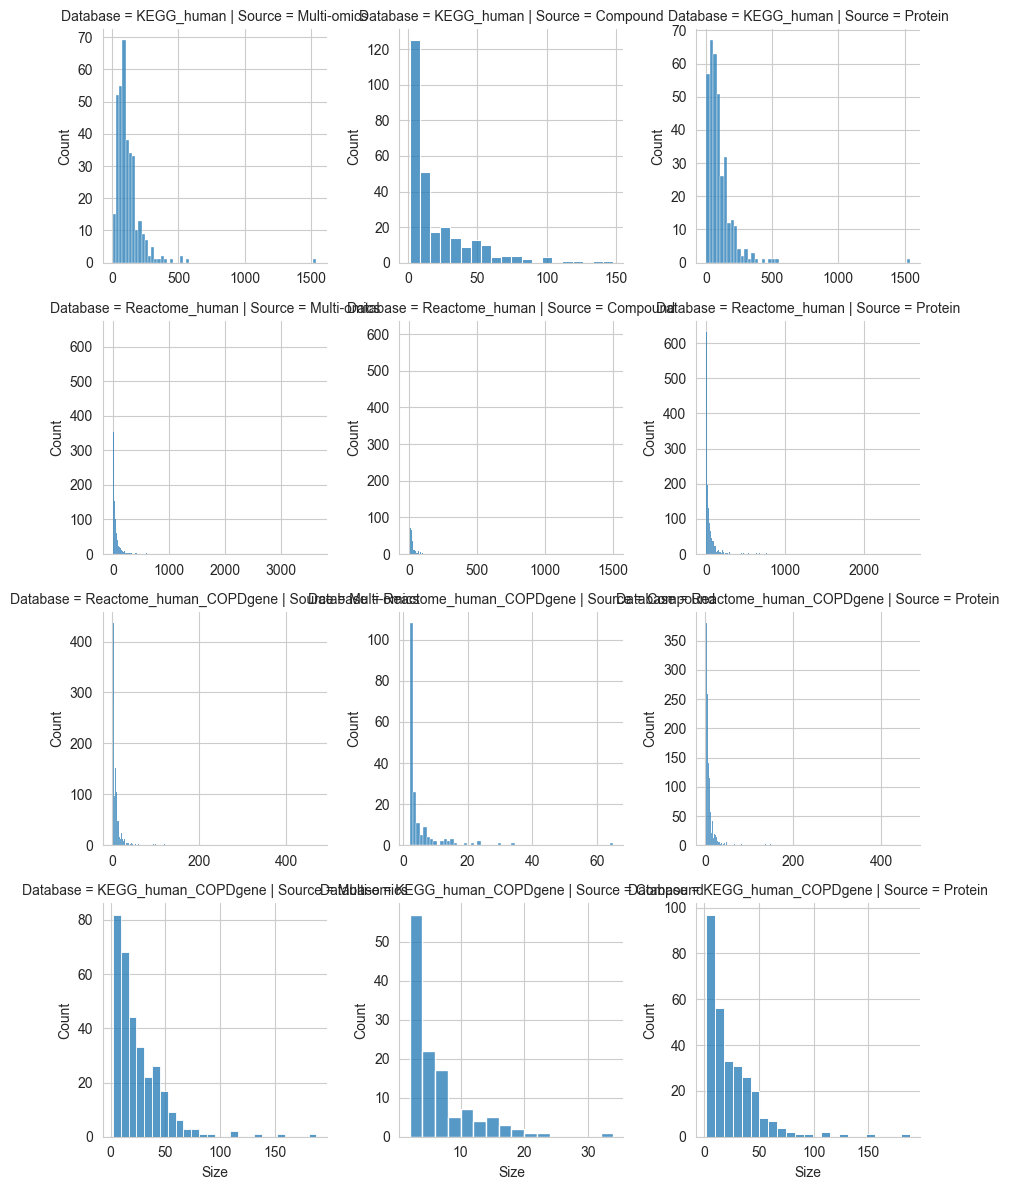

In [47]:
g = sns.FacetGrid(data=combined_df_dist, col='Source', row='Database', sharex=False, sharey=False)

g.map_dataframe(
    sns.histplot, x="Size")
plt.tight_layout()
plt.show()

In [51]:
print(sizes_reactome_copd_mp)

[8, 54, 152, 25, 2, 19, 7, 4, 5, 4, 4, 3, 4, 2, 4, 2, 2, 12, 5, 2, 4, 2, 5, 3, 3, 12, 3, 6, 16, 5, 12, 2, 13, 12, 13, 13, 12, 19, 30, 41, 19, 9, 7, 2, 15, 3, 3, 12, 53, 13, 11, 13, 14, 7, 7, 4, 2, 18, 25, 12, 4, 13, 10, 9, 17, 19, 25, 3, 10, 3, 2, 3, 11, 5, 6, 4, 11, 4, 65, 8, 151, 3, 261, 122, 6, 2, 2, 7, 2, 2, 5, 2, 4, 5, 5, 17, 13, 25, 4, 4, 10, 237, 19, 7, 3, 18, 9, 4, 3, 7, 45, 88, 13, 8, 3, 5, 5, 5, 5, 5, 2, 2, 7, 3, 13, 3, 7, 17, 13, 7, 21, 8, 2, 15, 4, 3, 6, 10, 2, 6, 6, 5, 36, 4, 23, 12, 22, 3, 3, 7, 7, 7, 7, 2, 2, 7, 407, 11, 5, 2, 3, 9, 3, 24, 19, 20, 12, 4, 2, 11, 2, 8, 2, 12, 6, 10, 12, 63, 290, 13, 3, 4, 6, 6, 2, 3, 2, 5, 39, 3, 32, 4, 6, 30, 2, 30, 30, 6, 14, 5, 9, 3, 9, 2, 2, 4, 27, 26, 28, 26, 33, 27, 32, 236, 13, 470, 6, 2, 3, 10, 14, 2, 45, 5, 17, 8, 9, 16, 6, 4, 6, 2, 2, 3, 4, 4, 9, 10, 15, 9, 13, 9, 2, 2, 2, 2, 3, 3, 5, 16, 4, 12, 10, 2, 2, 11, 2, 2, 2, 2, 16, 11, 3, 9, 6, 5, 4, 9, 7, 11, 9, 2, 2, 2, 2, 33, 10, 3, 6, 2, 8, 10, 12, 9, 19, 2, 5, 12, 18, 4, 3, 23, 2, 

In [53]:
print(sizes_kegg_copd_mp)

[17, 6, 10, 8, 6, 8, 7, 7, 3, 3, 11, 3, 9, 7, 14, 29, 15, 23, 17, 18, 19, 8, 8, 12, 19, 15, 16, 17, 13, 7, 11, 7, 2, 18, 9, 8, 10, 3, 4, 2, 4, 6, 13, 9, 9, 11, 6, 11, 2, 10, 12, 6, 7, 2, 6, 2, 5, 15, 10, 2, 3, 7, 2, 9, 7, 16, 4, 3, 10, 14, 112, 18, 3, 13, 13, 10, 5, 41, 41, 4, 20, 34, 3, 5, 7, 2, 3, 2, 6, 7, 3, 3, 3, 3, 2, 11, 3, 115, 44, 94, 77, 62, 19, 35, 188, 69, 70, 44, 55, 41, 6, 39, 30, 30, 23, 25, 19, 14, 2, 13, 25, 17, 21, 23, 28, 6, 24, 132, 15, 48, 14, 14, 13, 8, 40, 36, 5, 22, 20, 34, 7, 8, 30, 60, 30, 22, 47, 29, 55, 13, 43, 21, 13, 20, 33, 46, 24, 17, 43, 5, 40, 36, 16, 11, 34, 87, 38, 54, 51, 39, 48, 42, 22, 33, 26, 50, 23, 21, 2, 12, 18, 15, 5, 43, 16, 10, 19, 16, 8, 19, 13, 8, 10, 28, 54, 23, 15, 29, 12, 22, 28, 17, 28, 11, 27, 18, 24, 18, 12, 9, 17, 34, 6, 26, 12, 15, 25, 30, 51, 19, 34, 35, 14, 13, 7, 3, 5, 14, 10, 18, 10, 27, 12, 27, 11, 16, 15, 46, 35, 33, 18, 15, 39, 74, 5, 12, 12, 18, 8, 4, 25, 34, 49, 41, 26, 14, 38, 30, 41, 20, 27, 42, 32, 22, 61, 40, 59, 40, 6

In [54]:
from itertools import islice

def random_pathways(mol_avail:list, pathway_sizes:list):
    # shuffle all molecules available (including duplicates)
    rng = np.random.default_rng()
    mol_shuffled = iter(rng.permutation(mol_avail))
    # arrange them into exact original pathway sizes in dataset
    reactome_random = [list(islice(iter(mol_shuffled), i)) for i in pathway_sizes]
    # make into pathway dict
    reactome_random_d = dict(zip(range(0, len(reactome_random)), reactome_random))
    reactome_random_df =  pd.DataFrame.from_dict(reactome_random_d, orient='index', dtype="object")
    reactome_random_df["Pathway_name"] = ['Pathway_' + str(i) for i in range(0, len(reactome_random_d))]
    reactome_random_df.insert(0, 'Pathway_name', reactome_random_df.pop('Pathway_name'))

    return reactome_random, reactome_random_df

In [55]:
compounds_present = metab.columns.tolist()
pathways_present_m = {k: v for k, v in reactome_dict.items() if len([i for i in compounds_present if i in v]) >= 2}
path_coverage_m = {k: [i for i in v if i in compounds_present] for k, v in pathways_present_m.items()}
proteins_present = prot.columns.tolist()
pathways_present_p = {k: v for k, v in reactome_dict.items() if len([i for i in proteins_present if i in v]) >= 2}
path_coverage_p = {k: [i for i in v if i in proteins_present] for k, v in pathways_present_p.items()}

mol_avail = sum(list(path_coverage_m.values()), []) + sum(path_coverage_p.values(), [])

In [56]:
random_paths_d, random_pathways_df = random_pathways(mol_avail=mol_avail, pathway_sizes=sizes_reactome_copd_mp)
random_kegg_paths_d, random_kegg_pathways_df = random_pathways(mol_avail=mol_avail, pathway_sizes=sizes_kegg_copd_mp)


In [58]:
random_pathways_df.to_csv('Reactome_Random_Pathways_MO.csv')

In [60]:
random_kegg_pathways_df.to_csv('Reactome_Random_Pathways_KEGGsize_MO.csv')

In [62]:
len(set(mol_avail))

1151

In [63]:
mol_avail_kegg = sum(list(path_coverage_m_kegg.values()), []) + sum(path_coverage_p_kegg.values(), [])

In [64]:
len(set(mol_avail_kegg))

1143